In [36]:
import pandas as pd
import numpy as np
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import modelling as mdl
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import tree
import sklearn
from sklearn.experimental import enable_hist_gradient_boosting
import tkinter
import plotly
import statsmodels.api as sma

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [37]:
MLdb = mdl.MLdata('../data_sets/feats/')
MLdb.load_datasets()
MLdb.load_lobith_feats()
MLdb.set_dataset(2,features=('lobith_feats','gemaal_feats'))
# MLdb.set_dataset(2,features=tuple())



In [ ]:
MLdb.dataset.columns

Index(['Datum', 'Tijd (Europe/Amsterdam)',
       'OW000-008/WNS3838 - gemeten waarde [°C]', 'EGV_OPP',
       'OW000-008/WNS3838 - gemeten waarde [°C].1',
       'OW000-008/WNS7670 - gemeten waarde [mS/cm].1', 'datetime', 'maand',
       'hour', 'hour_sin',
       ...
       'lobith_debiet_shifted_1728_roll_6_func_sum',
       'lobith_debiet_shifted_1728_roll_72_func_sum',
       'lobith_debiet_shifted_1728_roll_144_func_sum', 'debiet_gemaal',
       'kwaliteit', 'is_active', 'count_on', 'count_off',
       'debiet_gemaal_shifted_0_roll_6_func_mean',
       'debiet_gemaal_shifted_0_roll_144_func_mean'],
      dtype='object', length=632)

In [ ]:

    # MLdb.combine_datasets()
    # print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
    # print(MLdb.datadict['ALL'])
    # print(MLdb.get_datasets())
    MLdb.clean_columns()
    MLdb.drop_na()
    MLdb.create_train_test_split(0.8)
    # MLdb.linear_regression()
    MLdb.scale_data()
    MLdb.dataset


OW000-008/WNS3838 - gemeten waarde [°C]  EGV_OPP  \
datetime                                                                
2016-12-21 20:00:00                                      5.8    2.087   
2016-12-21 20:10:00                                      5.8    2.089   
2016-12-21 20:20:00                                      5.8    2.190   
2016-12-21 20:30:00                                      5.8    2.238   
2016-12-21 20:40:00                                      5.8    2.245   
...                                                      ...      ...   
2022-02-10 19:30:00                                      5.9    0.733   
2022-02-10 19:40:00                                      5.9    0.733   
2022-02-10 19:50:00                                      5.9    0.737   
2022-02-10 20:00:00                                      5.9    0.750   
2022-02-10 20:10:00                                      5.9    0.745   

                     OW000-008/WNS3838 - gemeten waarde [°C].1  \
datetime                                                         
2016-12-21 20:00:00                                        5.3   
2016-12-21 20:10:00                                        5.3   
2016-12-21 20:20:00                                        5.3   
2016-12-21 20:30:00                                        5.3   
2016-12-21 20:40:00                                        5.3   
...                                                        ...   
2022-02-10 19:30:00                                        5.4   
2022-02-10 19:40:00                                        5.4   
2022-02-10 19:50:00                                        5.4   
2022-02-10 20:00:00                                        5.4   
2022-02-10 20:10:00                                        5.4   

                     OW000-008/WNS7670 - gemeten waarde [mS/cm].1  hour  \
datetime                                                                  
2016-12-21 20:00:00                                         1.941  20.0   
2016-12-21 20:10:00                                         1.962  20.0   
2016-12-21 20:20:00                                         1.794  20.0   
2016-12-21 20:30:00                                         1.840  20.0   
2016-12-21 20:40:00                                         2.221  20.0   
...                                                           ...   ...   
2022-02-10 19:30:00                                         0.873  19.0   
2022-02-10 19:40:00                                         0.888  19.0   
2022-02-10 19:50:00                                         0.893  19.0   
2022-02-10 20:00:00                                         0.887  20.0   
2022-02-10 20:10:00                                         0.879  20.0   

                     hour_sin  hour_cos  weekday   weekday_sin  weekday_cos  \
datetime                                                                      
2016-12-21 20:00:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:10:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:20:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:30:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
2016-12-21 20:40:00 -0.730836  0.682553      2.0  8.660254e-01         -0.5   
...                       ...       ...      ...           ...          ...   
2022-02-10 19:30:00 -0.887885  0.460065      3.0  1.224647e-16         -1.0   
2022-02-10 19:40:00 -0.887885  0.460065      3.0  1.224647e-16         -1.0   
2022-02-10 19:50:00 -0.887885  0.460065      3.0  1.224647e-16         -1.0   
2022-02-10 20:00:00 -0.730836  0.682553      3.0  1.224647e-16         -1.0   
2022-02-10 20:10:00 -0.730836  0.682553      3.0  1.224647e-16         -1.0   

                     ...  lobith_debiet_shifted_1584_roll_144_func_sum  \
datetime             ...                                                 
2016-12-21 20:00:00  ...                                    

In [ ]:
MLdb.test_x

OW000-008/WNS3838 - gemeten waarde [°C]   EGV_OPP  \
datetime                                                                 
2021-02-01 02:50:00                                -1.363273 -0.814774   
2021-02-01 03:00:00                                -1.363273 -0.816915   
2021-02-01 03:10:00                                -1.363273 -0.812633   
2021-02-01 03:20:00                                -1.363273 -0.812205   
2021-02-01 03:30:00                                -1.363273 -0.824193   
...                                                      ...       ...   
2022-02-10 19:30:00                                -1.023860 -0.844744   
2022-02-10 19:40:00                                -1.023860 -0.844744   
2022-02-10 19:50:00                                -1.023860 -0.843031   
2022-02-10 20:00:00                                -1.023860 -0.837465   
2022-02-10 20:10:00                                -1.023860 -0.839606   

                     OW000-008/WNS3838 - gemeten waarde [°C].1  \
datetime                                                         
2021-02-01 02:50:00                                  -1.376011   
2021-02-01 03:00:00                                  -1.376011   
2021-02-01 03:10:00                                  -1.360611   
2021-02-01 03:20:00                                  -1.376011   
2021-02-01 03:30:00                                  -1.376011   
...                                                        ...   
2022-02-10 19:30:00                                  -1.037211   
2022-02-10 19:40:00                                  -1.037211   
2022-02-10 19:50:00                                  -1.037211   
2022-02-10 20:00:00                                  -1.037211   
2022-02-10 20:10:00                                  -1.037211   

                     OW000-008/WNS7670 - gemeten waarde [mS/cm].1      hour  \
datetime                                                                      
2021-02-01 02:50:00                                     -0.804803 -1.371331   
2021-02-01 03:00:00                                     -0.804803 -1.226990   
2021-02-01 03:10:00                                     -0.805196 -1.226990   
2021-02-01 03:20:00                                     -0.801263 -1.226990   
2021-02-01 03:30:00                                     -0.800476 -1.226990   
...                                                           ...       ...   
2022-02-10 19:30:00                                     -0.873250  1.082469   
2022-02-10 19:40:00                                     -0.867349  1.082469   
2022-02-10 19:50:00                                     -0.865382  1.082469   
2022-02-10 20:00:00                                     -0.867742  1.226810   
2022-02-10 20:10:00                                     -0.870889  1.226810   

                     hour_sin  hour_cos   weekday  weekday_sin  weekday_cos  \
datetime                                                                      
2021-02-01 02:50:00  0.750609  1.126195 -1.503271     0.002839     1.154720   
2021-02-01 03:00:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
2021-02-01 03:10:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
2021-02-01 03:20:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
2021-02-01 03:30:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
...                       ...       ...       ...          ...          ...   
2022-02-10 19:30:00 -1.282676  0.578787 -0.003261     0.002839    -1.539481   
2022-02-10 19:40:00 -1.282676  0.578787 -0.003261     0.002839    -1.539481   
2022-02-10 19:50:00 -1.282676  0.578787 -0.003261     0.002839    -1.539481   
2022-02-10 20:00:00 -1.055796  0.887626 -0.003261     0.002839    -1.539481   
2022-02-10 20:10:00 -1.055796  0.887626 -0.003261     0.002839    -1.539481   

                     ...  lobith_debiet_shifted_1584_roll_144_func_sum  \
datetime             ...                                             

In [ ]:
# MLdb.use_model(modelfunc = HistGradientBoostingRegressor)
MLdb.use_model(modelfunc = Lars, verbose = True)


1.6763842217091864


In [ ]:
model = MLdb.model


In [ ]:
# X = MLdb.train_x
# y = MLdb.train_y.iloc[:,6*36-1]
# X2 = sma.add_constant(X)
# est = sma.OLS(y,X2)
# est2 = est.fit()
# print(est2.summary())


In [ ]:
y_pred = model.predict(MLdb.test_x)
horizon = 6*6
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_y.index,y_pred[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
plt.title('Model op t + '+str(horizon))
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [ ]:
# print(MLdb.test_y)
# print(y_pred)
test_y = MLdb.test_y.iloc[:,0].values
pred_y = y_pred[:,0]

# print(mse(MLdb.test_y,y_pred)**(1/2))

In [ ]:
# MLdb.test_x

In [ ]:
MLdb.test_x

OW000-008/WNS3838 - gemeten waarde [°C]   EGV_OPP  \
datetime                                                                 
2021-02-01 02:50:00                                -1.363273 -0.814774   
2021-02-01 03:00:00                                -1.363273 -0.816915   
2021-02-01 03:10:00                                -1.363273 -0.812633   
2021-02-01 03:20:00                                -1.363273 -0.812205   
2021-02-01 03:30:00                                -1.363273 -0.824193   
...                                                      ...       ...   
2022-02-10 19:30:00                                -1.023860 -0.844744   
2022-02-10 19:40:00                                -1.023860 -0.844744   
2022-02-10 19:50:00                                -1.023860 -0.843031   
2022-02-10 20:00:00                                -1.023860 -0.837465   
2022-02-10 20:10:00                                -1.023860 -0.839606   

                     OW000-008/WNS3838 - gemeten waarde [°C].1  \
datetime                                                         
2021-02-01 02:50:00                                  -1.376011   
2021-02-01 03:00:00                                  -1.376011   
2021-02-01 03:10:00                                  -1.360611   
2021-02-01 03:20:00                                  -1.376011   
2021-02-01 03:30:00                                  -1.376011   
...                                                        ...   
2022-02-10 19:30:00                                  -1.037211   
2022-02-10 19:40:00                                  -1.037211   
2022-02-10 19:50:00                                  -1.037211   
2022-02-10 20:00:00                                  -1.037211   
2022-02-10 20:10:00                                  -1.037211   

                     OW000-008/WNS7670 - gemeten waarde [mS/cm].1      hour  \
datetime                                                                      
2021-02-01 02:50:00                                     -0.804803 -1.371331   
2021-02-01 03:00:00                                     -0.804803 -1.226990   
2021-02-01 03:10:00                                     -0.805196 -1.226990   
2021-02-01 03:20:00                                     -0.801263 -1.226990   
2021-02-01 03:30:00                                     -0.800476 -1.226990   
...                                                           ...       ...   
2022-02-10 19:30:00                                     -0.873250  1.082469   
2022-02-10 19:40:00                                     -0.867349  1.082469   
2022-02-10 19:50:00                                     -0.865382  1.082469   
2022-02-10 20:00:00                                     -0.867742  1.226810   
2022-02-10 20:10:00                                     -0.870889  1.226810   

                     hour_sin  hour_cos   weekday  weekday_sin  weekday_cos  \
datetime                                                                      
2021-02-01 02:50:00  0.750609  1.126195 -1.503271     0.002839     1.154720   
2021-02-01 03:00:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
2021-02-01 03:10:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
2021-02-01 03:20:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
2021-02-01 03:30:00  1.055792  0.887626 -1.503271     0.002839     1.154720   
...                       ...       ...       ...          ...          ...   
2022-02-10 19:30:00 -1.282676  0.578787 -0.003261     0.002839    -1.539481   
2022-02-10 19:40:00 -1.282676  0.578787 -0.003261     0.002839    -1.539481   
2022-02-10 19:50:00 -1.282676  0.578787 -0.003261     0.002839    -1.539481   
2022-02-10 20:00:00 -1.055796  0.887626 -0.003261     0.002839    -1.539481   
2022-02-10 20:10:00 -1.055796  0.887626 -0.003261     0.002839    -1.539481   

                     ...  lobith_debiet_shifted_1584_roll_144_func_sum  \
datetime             ...                                             

In [ ]:
y_pred_naive = MLdb.naive_predictive()

In [ ]:
y_pred_naive

EGV_OPP_(t+1)  EGV_OPP_(t+2)  EGV_OPP_(t+3)  \
datetime                                                           
2021-02-01 02:50:00          0.803          0.803          0.803   
2021-02-01 03:00:00          0.798          0.798          0.798   
2021-02-01 03:10:00          0.808          0.808          0.808   
2021-02-01 03:20:00          0.809          0.809          0.809   
2021-02-01 03:30:00          0.781          0.781          0.781   
...                            ...            ...            ...   
2022-02-10 19:30:00          0.733          0.733          0.733   
2022-02-10 19:40:00          0.733          0.733          0.733   
2022-02-10 19:50:00          0.737          0.737          0.737   
2022-02-10 20:00:00          0.750          0.750          0.750   
2022-02-10 20:10:00          0.745          0.745          0.745   

                     EGV_OPP_(t+4)  EGV_OPP_(t+5)  EGV_OPP_(t+6)  \
datetime                                                           
2021-02-01 02:50:00          0.803          0.803          0.803   
2021-02-01 03:00:00          0.798          0.798          0.798   
2021-02-01 03:10:00          0.808          0.808          0.808   
2021-02-01 03:20:00          0.809          0.809          0.809   
2021-02-01 03:30:00          0.781          0.781          0.781   
...                            ...            ...            ...   
2022-02-10 19:30:00          0.733          0.733          0.733   
2022-02-10 19:40:00          0.733          0.733          0.733   
2022-02-10 19:50:00          0.737          0.737          0.737   
2022-02-10 20:00:00          0.750          0.750          0.750   
2022-02-10 20:10:00          0.745          0.745          0.745   

                     EGV_OPP_(t+7)  EGV_OPP_(t+8)  EGV_OPP_(t+9)  \
datetime                                                           
2021-02-01 02:50:00          0.803          0.803          0.803   
2021-02-01 03:00:00          0.798          0.798          0.798   
2021-02-01 03:10:00          0.808          0.808          0.808   
2021-02-01 03:20:00          0.809          0.809          0.809   
2021-02-01 03:30:00          0.781          0.781          0.781   
...                            ...            ...            ...   
2022-02-10 19:30:00          0.733          0.733          0.733   
2022-02-10 19:40:00          0.733          0.733          0.733   
2022-02-10 19:50:00          0.737          0.737          0.737   
2022-02-10 20:00:00          0.750          0.750          0.750   
2022-02-10 20:10:00          0.745          0.745          0.745   

                     EGV_OPP_(t+10)  ...  EGV_OPP_(t+207)  EGV_OPP_(t+208)  \
datetime                             ...                                     
2021-02-01 02:50:00           0.803  ...            0.803            0.803   
2021-02-01 03:00:00           0.798  ...            0.798            0.798   
2021-02-01 03:10:00           0.808  ...            0.808            0.808   
2021-02-01 03:20:00           0.809  ...            0.809            0.809   
2021-02-01 03:30:00           0.781  ...            0.781            0.781   
...                             ...  ...              ...              ...   
2022-02-10 19:30:00           0.733  ...            0.733            0.733   
2022-02-10 19:40:00           0.733  ...            0.733            0.733   
2022-02-10 19:50:00           0.737  ...            0.737            0.737   
2022-02-10 20:00:00           0.750  ...            0.750            0.750   
2022-02-10 20:10:00           0.745  ...            0.745            0.745   

                     EGV_OPP_(t+209)  EGV_OPP_(t+210)  EGV_OPP_(t+211)  \
datetime                                                                 
2021-02-01 02:50:00            0.803            0.803            0.803   
2021-02-01 03:00:00            0.798            0.798            0.798   
2021-02-01 03:10:00            0.808            0.808  

<Figure size 432x288 with 0 Axes>

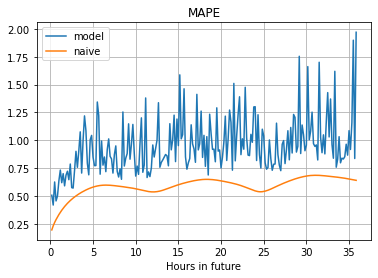

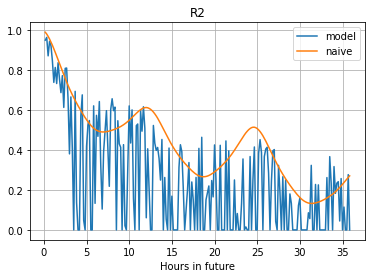

<Figure size 432x288 with 0 Axes>

In [ ]:
mape_list = []
R2_list = []
mape_list_naive = []
R2_list_naive = []


for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    pred_y = y_pred[:,i]
    pred_y_naive = y_pred_naive.iloc[:,i]
    mape_list.append(mape(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    mape_list_naive.append(mape(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))

R2_list = np.array(R2_list).clip(min=0)


x_bereik = [(i*10+10)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,mape_list,label = 'model')
plt.plot(x_bereik,mape_list_naive,label = 'naive')
plt.title('MAPE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()


In [ ]:
# TODO